In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

sns.set()

In [96]:
#new results
df = pd.read_csv("pretrainingOutput.csv")
df = df[df["Date Category"] == 2]

df["Participant ID"].unique()

array(['5ad0f1934d061300011b0a4d', '570e6b4fc9e604000f020a6f',
       '612eac9f6c232dc7efccc967', '62aa265d938c612f7c8361e3',
       '55ae64defdf99b3f864653e7', '5c35dd34be3cea000117948f',
       '616891e25a026e1f7262116c', '5ca3cafa2707e10001a04746',
       '610ce0a48fc7e68abc4070c1', '613116efc0cb4b7e8d532855',
       '5b27c8c9051c6e00019d0c96', '602454a47d0d7d121a1e444b',
       '6171e05a8bd75852eeb6b0bc', '6101c49c2727ad36a6c593af',
       '6113a86e9e254bad97528743', '56435b83942576000a66eb5d',
       '5f72adea4576d21f8ac889a0', '60c7c096903b9b083aa00c4f',
       '62c3430ae19d78462af9e743', '62b29802f626d80a1caed506',
       '627935c4e5d7e70b502e206e', '5974ce5364b35a00019dd811',
       '5e5cc9ce92d80948da643ebc', '62b443cd6bb4a97f543cb73e',
       '5a607a7eac56240001544493', '611622ddd8be1ac51298cb89',
       '613aaf8a8dc36e94fa4f1ba7', '5c7cf1adc8c9920015d0bc60',
       '6113d948bcb1f232c85bdcf3', '5a22d662d6fdbc00011c92ce',
       '6147c45e2fd30e98355c1e52', '61015f63f9a351d3171

In [97]:
# overall main question correctness rate
df[(df["Correctness"] != -1)]["Correctness"].mean()

0.6245954692556634

In [60]:
#baseline main question correctness rate
df_baseline_eval = df[(df["Prompt Condition"] == 0) & (df["Correctness"] != -1) & (~df["Question ID"].str.contains("-"))]
df_baseline_eval["Correctness"].mean()

0.7366071428571429

In [61]:
#quiz group main question correctness rate
df_quiz_eval = df[(df["Prompt Condition"] == 1) & (df["Correctness"] != -1) & (~df["Question ID"].str.contains("-"))]
df_quiz_eval["Correctness"].mean()

0.59375

In [62]:
#dict of collectSharePairs
collectSharePairs = {'Q1215': 'Q1233', 'Q1263': 'Q1264', 'Q1236': 'Q1234', 'Q1241': 'Q1242', 'Q1271': 'QID1277', 'Q1265': 'Q1266', 'Q1259': 'Q1260', 'Q1253': 'Q1254', 'Q1247': 'Q1248', 'Q1245': 'Q1246', 'Q1243': 'Q1244', 'Q1249': 'Q1250', 'Q1251': 'Q1252', 'Q1214': 'Q1231', 'Q1237': 'Q1238', 'Q1239': 'QID1245', 'Q1269': 'Q1270', 'Q1267': 'Q1268', 'Q1261': 'Q1262', 'Q1257': 'Q1258', 'Q1255': 'Q1256'}

0.7351190476190477 0.5952380952380952


<BarContainer object of 2 artists>

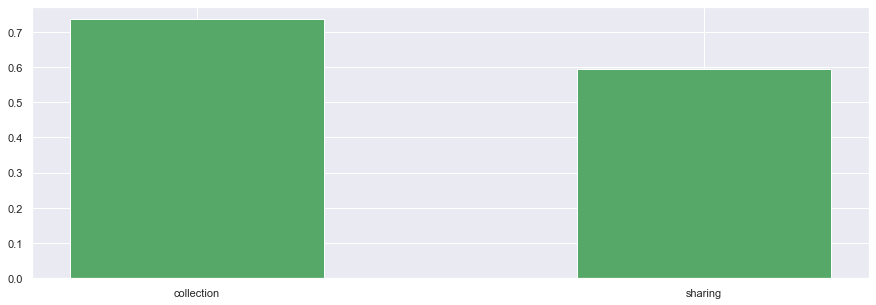

In [63]:
#collect and share only correctness rates
collectAverage = 0
shareAverage = 0
for question in collectSharePairs:
    shareQ = collectSharePairs[question]
    cqOnly = df[(df["Question ID"] == question)]
    sqOnly = df[(df["Question ID"] == shareQ)]
    collectAverage += cqOnly["Correctness"].mean()
    shareAverage += sqOnly["Correctness"].mean()
collectAverage /= len(collectSharePairs)
shareAverage /= len(collectSharePairs)
print(collectAverage, shareAverage)
typeDict = {"collection": collectAverage, "sharing": shareAverage}
plt.figure(figsize=(15,5))
plt.bar(typeDict.keys(), typeDict.values(), width=.5, color='g')

0.5625
0.578125
0.8125
0.90625
0.796875
0.796875
0.359375
0.71875
0.65625
0.59375
0.421875
0.8125
0.71875
0.828125
0.546875
0.625
0.734375
0.390625
0.4375
0.828125
0.84375


<BarContainer object of 21 artists>

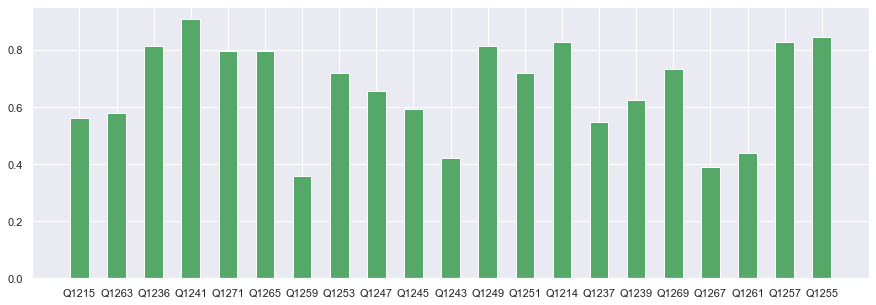

In [49]:
#correct answer rate for each question (non-pretraining)
questionAvg = dict()
for question in collectSharePairs:
    shareQ = collectSharePairs[question]
    cqOnly = df[(df["Question ID"] == question)]
    sqOnly = df[(df["Question ID"] == shareQ)]
    collectAverage = cqOnly["Correctness"].mean()
    shareAverage = sqOnly["Correctness"].mean()
    newAverage = (collectAverage + shareAverage)/2
    print(newAverage)
    questionAvg[question] = newAverage
plt.figure(figsize=(15,5))
plt.bar(questionAvg.keys(), questionAvg.values(), width=.5, color='g')


<AxesSubplot:xlabel='Fluency Level', ylabel='Correctness'>

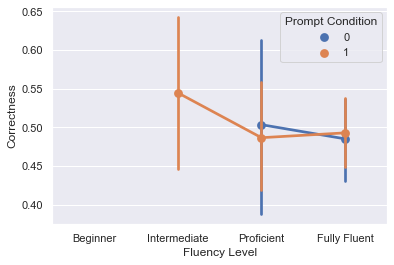

In [67]:
#analysis of fluency level
sns.pointplot(data=df, x="Fluency Level", y="Correctness", hue="Prompt Condition", order=["Beginner", "Intermediate", "Proficient", "Fully Fluent"])


In [106]:
#old data
df1 = pd.read_csv("pretrainingOutput.csv")
df1 = df[df["Date Category"] == 1]

df1["Participant ID"].unique()

array(['56210effed6e5a000ac7f3a5', '605f064127eec9cb4494b4d9',
       '5f761e5106b786071f45b4aa', '5be59ce3520a3300010e28a9',
       '5de831cad4995d000c5fb540', '611cf0fcb571ffef2625d948',
       '61365f766033bc62f92053dc', '6109482350367148ce0aa834',
       '61006e8a4fe954de47730409', '617134f939b0aa685b96bb14',
       '5fd50a355025422fd25bb05b', '5eb3a51f58efe718f5cffdb4',
       '5a8d8079190420000156435d', '61363ce02e6022a741d63a6e',
       '60d1c46dcf527589711cf768', '5e8cb59cf38a3b057a543c1e', 'sd',
       '5e9ce0a46976671ceda6082a', '62b4a68f5a0b656aa7a07891',
       '62a740d9c5f27d3efa9d9403', '5caa7f8c0d95570013d82f2f',
       '5ecae16e5a125126cbb0e08b', '5eda1c91460b765ded2a52d5',
       '613bb29f16252362f4dc11a3', '611023befc2052d878c7f50c',
       '60fda1e636243e757ed13ab8', '5cefd79bc37f4f0018de98da',
       '5c549c6372fd9000018b5968', '60ef4432df04da6821fec20a',
       '58d0632c2fc72000011f8c57', '62976e7114308ee7c69d10ae',
       '612520bd6605794b27e6a0fd', '5e63e24eaf3bd

In [118]:
df1[(df1["Correctness"] != -1)]["Correctness"].mean()

0.3972602739726027

In [125]:
#baseline main question correctness rate
df_baseline_eval = df1[(df1["Prompt Condition"] == 0)]
df_baseline_eval.to_csv("baseline.csv")
print(df_baseline_eval)
df_baseline_eval["Correctness"].mean()

     Unnamed: 0 Question ID            Participant ID  \
239         553      Q2-1-1  5ecae16e5a125126cbb0e08b   
240         554      Q2-1-1  5eda1c91460b765ded2a52d5   
241         555      Q2-1-1  613bb29f16252362f4dc11a3   
247         561      Q2-1-1  611023befc2052d878c7f50c   
249         563      Q2-1-1  60fda1e636243e757ed13ab8   
..          ...         ...                       ...   
720        1058      Q2-9-1  5d88e9d13e9a6e0001084e80   
721        1060      Q2-9-1  5765c0fcf2e23200017ded5e   
722        1061      Q2-9-1  60204458e6a42863349abc9f   
725        1064      Q2-9-1  5f97e6601f6d0e016087fc91   
726        1065      Q2-9-1  5bf1a218f5e4460001e033c6   

                                           Description Answer Correct Answer  \
239  An app opens a webview that allows users to fr...    NaN             No   
240  An app opens a webview that allows users to fr...    NaN             No   
241  An app opens a webview that allows users to fr...    NaN             N

-1.0

In [116]:
#quiz group main question correctness rate
df_quiz_eval = df1[(df1["Prompt Condition"] == 1) & (df1["Correctness"] != -1)]
df_quiz_eval["Correctness"].mean()

0.3972602739726027

In [92]:
# def miss_one_fn(row):
#     if row["Answer Index"] == 3 and row["Correct Answer Index"] == 0 and row["Question Category"] == "share exempt":
#         return 1
#     else:
#         return 0
#
# baseline_miss_one = df_baseline_eval[(df_baseline_eval["Correct Answer Index"] == 0) & (df_baseline_eval["Question Category"] == "share exempt")].apply(miss_one_fn, axis=1)
# print(baseline_miss_one.mean())
#
# quiz_miss_one = df_quiz_eval[(df_quiz_eval["Correct Answer Index"] == 0) & (df_quiz_eval["Question Category"] == "share exempt")].apply(miss_one_fn, axis=1)
# print(quiz_miss_one.mean())

In [ ]:
def miss_one_fn(row):
#     if row["Answer Index"] == 1 and row["Correct Answer Index"] == 2 and row["Question Category"] == "share special":
#         return 1
#     else:
#         return 0
#
# baseline_miss_one = df_baseline_eval[(df_baseline_eval["Correct Answer Index"] == 2) & (df_baseline_eval["Question Category"] == "share special")].apply(miss_one_fn, axis=1)
# print(baseline_miss_one.mean())
#
# quiz_miss_one = df_quiz_eval[(df_quiz_eval["Correct Answer Index"] == 2) & (df_quiz_eval["Question Category"] == "share special")].apply(miss_one_fn, axis=1)
# print(quiz_miss_one.mean())

<AxesSubplot:xlabel='Answer Index', ylabel='Probability'>

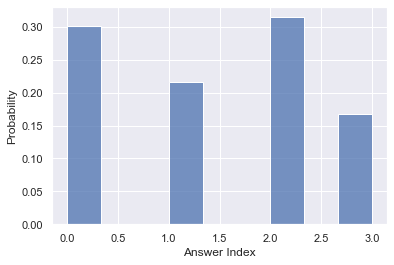

In [165]:
# baseline answer index distribution
sns.histplot(df[(df["Prompt Condition"] == 0) & (df["Correctness"] != -1) & (~df["Question ID"].str.contains("-"))], stat="probability", x="Answer Index")

<AxesSubplot:xlabel='Answer Index', ylabel='Probability'>

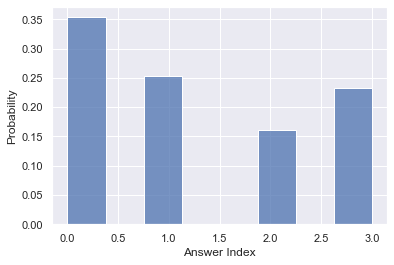

In [166]:
# quiz group answer index distribution
sns.histplot(df[(df["Prompt Condition"] == 1) & (df["Correctness"] != -1) & (~df["Question ID"].str.contains("-"))], stat="probability", x="Answer Index")


In [167]:
# Webviews
df_webview = df[df["Concept Group"] == "Webviews"]

print(df_webview[(df_webview["Prompt Condition"] == 0) & (df_webview["Correctness"] != -1)]["Correctness"].mean())
print(df_webview[(df_webview["Prompt Condition"] == 1) & (df_webview["Correctness"] != -1) & (~df_webview["Question ID"].str.contains("-"))]["Correctness"].mean())

0.5666666666666667
0.42105263157894735


In [168]:
# Service Providers
df_concept = df[df["Concept Group"] == "Service Providers"]

print(df_concept[(df_concept["Prompt Condition"] == 0) & (df_concept["Correctness"] != -1)]["Correctness"].mean())
print(df_concept[(df_concept["Prompt Condition"] == 1) & (df_concept["Correctness"] != -1) & (~df_concept["Question ID"].str.contains("-"))]["Correctness"].mean())

0.4444444444444444
0.6153846153846154


In [169]:
# Optional Data Collection
df_concept = df[df["Concept Group"] == "Optional Data Collection"]

print(df_concept[(df_concept["Prompt Condition"] == 0) & (df_concept["Correctness"] != -1)]["Correctness"].mean())
print(df_concept[(df_concept["Prompt Condition"] == 1) & (df_concept["Correctness"] != -1) & (~df_concept["Question ID"].str.contains("-"))]["Correctness"].mean())

0.375
0.6666666666666666


In [170]:
# Anonymization
df_concept = df[df["Concept Group"] == "Anonymization"]

print(df_concept[(df_concept["Prompt Condition"] == 0) & (df_concept["Correctness"] != -1)]["Correctness"].mean())
print(df_concept[(df_concept["Prompt Condition"] == 1) & (df_concept["Correctness"] != -1) & (~df_concept["Question ID"].str.contains("-"))]["Correctness"].mean())

0.0
0.5


In [171]:
# Legal Request
df_concept = df[df["Concept Group"] == "Legal Request"]

print(df_concept[(df_concept["Prompt Condition"] == 0) & (df_concept["Correctness"] != -1)]["Correctness"].mean())
print(df_concept[(df_concept["Prompt Condition"] == 1) & (df_concept["Correctness"] != -1) & (~df_concept["Question ID"].str.contains("-"))]["Correctness"].mean())

0.4
0.25


In [172]:
# User Consent
df_concept = df[df["Concept Group"] == "User Consent"]

print(df_concept[(df_concept["Prompt Condition"] == 0) & (df_concept["Correctness"] != -1)]["Correctness"].mean())
print(df_concept[(df_concept["Prompt Condition"] == 1) & (df_concept["Correctness"] != -1) & (~df_concept["Question ID"].str.contains("-"))]["Correctness"].mean())

0.07692307692307693
0.1


In [173]:
# Share Basic
df_concept = df[df["Concept Group"] == "Share Basic"]

print(df_concept[(df_concept["Prompt Condition"] == 0) & (df_concept["Correctness"] != -1)]["Correctness"].mean())
print(df_concept[(df_concept["Prompt Condition"] == 1) & (df_concept["Correctness"] != -1) & (~df_concept["Question ID"].str.contains("-"))]["Correctness"].mean())

0.5
0.5


In [174]:
# Collect Basic
df_concept = df[df["Concept Group"] == "Collect Basic"]

print(df_concept[(df_concept["Prompt Condition"] == 0) & (df_concept["Correctness"] != -1)]["Correctness"].mean())
print(df_concept[(df_concept["Prompt Condition"] == 1) & (df_concept["Correctness"] != -1) & (~df_concept["Question ID"].str.contains("-"))]["Correctness"].mean())

0.8571428571428571
0.75


In [175]:
# Off-device Server Transfers
df_concept = df[df["Concept Group"] == "Off-device Server Transfers"]

print(df_concept[(df_concept["Prompt Condition"] == 0) & (df_concept["Correctness"] != -1)]["Correctness"].mean())
print(df_concept[(df_concept["Prompt Condition"] == 1) & (df_concept["Correctness"] != -1) & (~df_concept["Question ID"].str.contains("-"))]["Correctness"].mean())

0.8571428571428571
0.5


In [176]:
# On-device processing and transfers
df_concept = df[df["Concept Group"] == "On-device processing and transfers"]

print(df_concept[(df_concept["Prompt Condition"] == 0) & (df_concept["Correctness"] != -1)]["Correctness"].mean())
print(df_concept[(df_concept["Prompt Condition"] == 1) & (df_concept["Correctness"] != -1) & (~df_concept["Question ID"].str.contains("-"))]["Correctness"].mean())

0.6666666666666666
0.2727272727272727


In [177]:
# Libraries/SDKs
df_concept = df[df["Concept Group"] == "Libraries/SDKs"]

print(df_concept[(df_concept["Prompt Condition"] == 0) & (df_concept["Correctness"] != -1)]["Correctness"].mean())
print(df_concept[(df_concept["Prompt Condition"] == 1) & (df_concept["Correctness"] != -1) & (~df_concept["Question ID"].str.contains("-"))]["Correctness"].mean())

0.625
0.375


In [178]:
# End to End Encryption
df_concept = df[df["Concept Group"] == "End to End Encryption"]

print(df_concept[(df_concept["Prompt Condition"] == 0) & (df_concept["Correctness"] != -1)]["Correctness"].mean())
print(df_concept[(df_concept["Prompt Condition"] == 1) & (df_concept["Correctness"] != -1) & (~df_concept["Question ID"].str.contains("-"))]["Correctness"].mean())

0.5555555555555556
1.0


In [179]:
# Ephemeral Processing
df_concept = df[df["Concept Group"] == "Ephemeral Processing"]

print(df_concept[(df_concept["Prompt Condition"] == 0) & (df_concept["Correctness"] != -1)]["Correctness"].mean())
print(df_concept[(df_concept["Prompt Condition"] == 1) & (df_concept["Correctness"] != -1) & (~df_concept["Question ID"].str.contains("-"))]["Correctness"].mean())

0.5
0.3333333333333333


In [180]:
# Pseudynoymization
df_concept = df[df["Concept Group"] == "Pseudynoymization"]

print(df_concept[(df_concept["Prompt Condition"] == 0) & (df_concept["Correctness"] != -1)]["Correctness"].mean())
print(df_concept[(df_concept["Prompt Condition"] == 1) & (df_concept["Correctness"] != -1) & (~df_concept["Question ID"].str.contains("-"))]["Correctness"].mean())

0.875
0.5
